In [1]:
#pip install -U folium

# Week 0 - actual 2nd course assignment starts here

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/post-codes-toronto/pstalcodes.csv
/kaggle/input/toronto3/Neighbourhoods.csv
/kaggle/input/coordinates-toronto/Coord.csv
/kaggle/input/toronto2/COVID-19Neighbourh.csv
/kaggle/input/toronto/CityofToronto_COVID-19_Data.xlsx - Rates of COVID-19 by Neighbourh.csv
/kaggle/input/toronto/Neighbourhoods.geojson


### The postcodes for Toronto are avaible at [[https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M)]

There are several ways to get the data from the table such as beuatiful soup or reading the URL inot a dataframe.  The Capstone  instructions said d I can use any method so I simply selected and pasted the table area into a LibreOffice documnent then from that cut and pasted the data into a spreadsheet and saved as a CSV file.  This I then saved in my Kaggle data reared and opened into a Pandas frame.

How ever we now have to clean the data by dropingpost codes not assigned and combining post code data listed twice usinf a comma.

In [3]:
df = pd.read_csv('/kaggle/input/post-codes-toronto/pstalcodes.csv') #This is the raw data before cleaning
df.head()

,Post Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


We have to remove any not assigned post codes

In [4]:
df = df[df.Borough != 'Not assigned']
df.head()

,Post Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


That looks good so far but need to find duplicate Post Code/s

In [5]:
#looking for duplicate Post Codes
df[df['Post Code'].duplicated() == True]


,Post Code,Borough,Neighbourhood


#### As you can see no duplicted post codes

****Looking for none assiged neighbour hoods[](http://)

In [6]:
df[df.Neighbourhood == 'Not assigned']


,Post Code,Borough,Neighbourhood


**** Again none so just maybe we have clean data

In [7]:
print(df.shape)

(103, 3)


## 103 rows 3 columns

In [8]:
#In the case we want to display all the rows
#pd.set_option('display.max_rows', df.shape[0]+1)


In [9]:
df.head()

,Post Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


# Now we add coordinates from CSV# 

In [10]:
df2 = pd.read_csv('/kaggle/input/coordinates-toronto/Coord.csv') #This is the raw data before cleaning
df2.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Add two new colomns to take the coordiantes

In [11]:
df2 = df2.rename(columns={"Postal Code": "Post Code"}) #to match df name

In [12]:
df2.head()

,Post Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [13]:
# df['Latitude'] = df2['Postal Codes'].map(df2.set_index('Postal Codes')['Latitude'])
            

### Merge after making headers the same

In [14]:
df = pd.merge(df, df2, on='Post Code', how='outer')
df.head()

,Post Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


# Week 1 Code Battle of the Neighbourhoods

# MOVING ON WITH CODE

> Readign current cases of covid-19 in different boroughs

In [15]:
df3 = pd.read_csv('/kaggle/input/toronto2/COVID-19Neighbourh.csv')
df3.head()

,Neighbourhood Name,"Rate per 100,000 people"
0,Yorkdale-Glen Park,763.307214
1,York University Heights,1021.998333
2,Yonge-St.Clair,151.660281
3,Yonge-Eglinton,101.548616
4,Wychwood,459.962367


**43.651070, -79.347015    is coorinates of Toronto**

Change headers to match others

In [16]:
df3 = df3.rename(columns={"Neighbourhood Name": "Neighbourhood"}) #to match df name

In [17]:
df3 = df3.rename(columns={"Rate per 100,000 people": "Rate"}) #to match df name

In [18]:
df3.head()

,Neighbourhood,Rate
0,Yorkdale-Glen Park,763.307214
1,York University Heights,1021.998333
2,Yonge-St.Clair,151.660281
3,Yonge-Eglinton,101.548616
4,Wychwood,459.962367


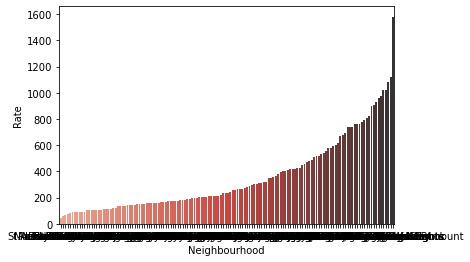

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#using df3
groupedvalues=df3.groupby('Rate').sum().reset_index()

pal = sns.color_palette("Reds_d", len(groupedvalues))
rank = groupedvalues["Rate"].argsort().argsort() 
tn = 'Neighbourhood'
first_chars = tn[0:3]
g=sns.barplot(x=tn,y='Rate',data=groupedvalues, palette=np.array(pal[::-1])[rank])



plt.show()

In [20]:
result = df3.sort_values(['Rate'])
result.tail()

,Neighbourhood,Rate
92,Guildwood,1018.453161
1,York University Heights,1021.998333
94,Glenfield-Jane Heights,1085.566233
13,Weston,1122.721209
86,Humber Heights-Westmount,1580.197296


In [21]:
result.head()


,Neighbourhood,Rate
28,St.Andrew-Windfields,44.913541
23,The Beaches,60.277275
57,Mount Pleasant East,65.573770
111,Danforth,72.418787
35,Rosedale-Moore Park,81.250299


Note the huge diference on the InfectionRate per 100,000 people

Add the rate column to df

In [22]:
def fuzzy_merge(df_1, df_2, key1, key2, threshold=90, limit=2):
    """
    :param df_1: the left table to join
    :param df_2: the right table to join
    :param key1: key column of the left table
    :param key2: key column of the right table
    :param threshold: how close the matches should be to return a match, based on Levenshtein distance
    :param limit: the amount of matches that will get returned, these are sorted high to low
    :return: dataframe with boths keys and matches
    """
    s = df_2[key2].tolist()

    m = df_1[key1].apply(lambda x: process.extract(x, s, limit=limit))    
    df_1['matches'] = m

    m2 = df_1['matches'].apply(lambda x: ', '.join([i[0] for i in x if i[1] >= threshold]))
    df_1['matches'] = m2

    return df_1

* **Being clever**  Attempted to use
df = pd.merge(df, df3, on='Neighbourhood', how='outer')
df = df.dropna() #drop where neighbour hoods disagree 
df
and only got 10 neighbouhood matches so found a fuzzy function as shown below

In [23]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

df = fuzzy_merge(df, df3, 'Neighbourhood','Neighbourhood', threshold=80)
#df = pd.merge(df, df3, how='outer')
#df = df.dropna() #drop where neighbour hoods disagree 
df

,Post Code,Borough,Neighbourhood,Latitude,Longitude,matches
0,M3A,North York,Parkwoods,43.753259,-79.329656,Parkwoods-Donalda
1,M4A,North York,Victoria Village,43.725882,-79.315572,"Victoria Village, Runnymede-Bloor West Village"
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,"Regent Park, Thorncliffe Park"
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,"Lawrence Park South, Lawrence Park North"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,"Yorkdale-Glen Park, Weston-Pellam Park"
...,...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944,"The Beaches, Old East York"
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,"South Riverdale, South Parkdale"
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,"Yorkdale-Glen Park, York University Heights"


In [24]:
print(df.shape)

(103, 6)


*The above does not have the data in df3 added if you do we get*

In [25]:
# definition of the boundaries in the map
district_geo = r'/kaggle/input/toronto/Neighbourhoods.geojson'
  
print (district_geo) #not used using circle size methos instead

/kaggle/input/toronto/Neighbourhoods.geojson


In [26]:
df = pd.merge(df, df3, how='outer')
# df = df.dropna() #drop where neighbourhoods disagree 

In [27]:
# pip install -U folium
import folium
T_COORDINATES = (43.651070, -79.347015)
mapdata = df
 
# for speed purposes
MAX_RECORDS = 1000
  
# create empty map zoomed in on San Francisco
map = folium.Map(location=T_COORDINATES, zoom_start=12)
 
# add a marker for every record in the filtered data, use a clustered view
# Make an empty map
m = folium.Map(location=T_COORDINATES, zoom_start=12)
 


  
#display(map)

Only 10 neighbourhoods because the niebourhood name in the data taken from the Toronto site are not spelt the same so let us use Torontos dtat set instead

In [28]:
df4 =  pd.read_csv('/kaggle/input/toronto3/Neighbourhoods.csv')
list(df4)
df4 = df4.drop(['X', 'Y', '_id'], axis=1)
df4.dropna()
df4.head()

,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
1,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
2,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
3,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
4,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"{u'type': u'Polygon', u'coordinates': (((-79.4..."


In [29]:
df4 = df4.rename(columns={"AREA_NAME": "Neighbourhood"}) #to match df name
df4 = df4.rename(columns={"LONGITUDE": "Longitude"}) #to match df name
df4 = df4.rename(columns={"LATITUDE": "Latitude"}) #to match df name
df4.head()

,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,Neighbourhood,AREA_DESC,Longitude,Latitude,OBJECTID,Shape__Area,Shape__Length,geometry
0,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
1,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
2,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
3,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
4,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"{u'type': u'Polygon', u'coordinates': (((-79.4..."


In [30]:
df4['Neighbourhood']=df4['Neighbourhood'].str[:10]



Because of (xx) number in text just compare first 8 characters

In [31]:
df3['Neighbourhood']=df3['Neighbourhood'].str[:10]
df3

,Neighbourhood,Rate
0,Yorkdale-G,763.307214
1,York Unive,1021.998333
2,Yonge-St.C,151.660281
3,Yonge-Egli,101.548616
4,Wychwood,459.962367
...,...,...
135,Banbury-Do,108.322802
136,Annex,232.588613
137,Alderwood,265.472042
138,Agincourt,197.836427


In [32]:
df4 = pd.merge(df4, df3, on='Neighbourhood', how='outer')
# df4 = df4.apply (pd.to_numeric, errors='coerce')

#df4 = df4.dropna()
df4

,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,Neighbourhood,AREA_DESC,Longitude,Latitude,OBJECTID,Shape__Area,Shape__Length,geometry,Rate
0,25886861.0,25926662.0,49885.0,94.0,94.0,Wychwood (,Wychwood (94),-79.425515,43.676919,16491505.0,3.217960e+06,7515.779658,"{u'type': u'Polygon', u'coordinates': (((-79.4...",NaN
1,25886820.0,25926663.0,49885.0,100.0,100.0,Yonge-Egli,Yonge-Eglinton (100),-79.403590,43.704689,16491521.0,3.160334e+06,7872.021074,"{u'type': u'Polygon', u'coordinates': (((-79.4...",101.548616
2,25886834.0,25926664.0,49885.0,97.0,97.0,Yonge-St.C,Yonge-St.Clair (97),-79.397871,43.687859,16491537.0,2.222464e+06,8130.411276,"{u'type': u'Polygon', u'coordinates': (((-79.3...",151.660281
3,25886593.0,25926665.0,49885.0,27.0,27.0,York Unive,York University Heights (27),-79.488883,43.765736,16491553.0,2.541821e+07,25632.335242,"{u'type': u'Polygon', u'coordinates': (((-79.5...",1021.998333
4,25886688.0,25926666.0,49885.0,31.0,31.0,Yorkdale-G,Yorkdale-Glen Park (31),-79.457108,43.714672,16491569.0,1.156669e+07,13953.408098,"{u'type': u'Polygon', u'coordinates': (((-79.4...",763.307214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,NaN,NaN,NaN,NaN,NaN,Danforth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.418787
169,NaN,NaN,NaN,NaN,NaN,Casa Loma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.583516
170,NaN,NaN,NaN,NaN,NaN,Bendale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,310.413885
171,NaN,NaN,NaN,NaN,NaN,Annex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,232.588613


In [33]:

print(df4.shape)

(173, 14)


In [34]:
df4

,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,Neighbourhood,AREA_DESC,Longitude,Latitude,OBJECTID,Shape__Area,Shape__Length,geometry,Rate
0,25886861.0,25926662.0,49885.0,94.0,94.0,Wychwood (,Wychwood (94),-79.425515,43.676919,16491505.0,3.217960e+06,7515.779658,"{u'type': u'Polygon', u'coordinates': (((-79.4...",NaN
1,25886820.0,25926663.0,49885.0,100.0,100.0,Yonge-Egli,Yonge-Eglinton (100),-79.403590,43.704689,16491521.0,3.160334e+06,7872.021074,"{u'type': u'Polygon', u'coordinates': (((-79.4...",101.548616
2,25886834.0,25926664.0,49885.0,97.0,97.0,Yonge-St.C,Yonge-St.Clair (97),-79.397871,43.687859,16491537.0,2.222464e+06,8130.411276,"{u'type': u'Polygon', u'coordinates': (((-79.3...",151.660281
3,25886593.0,25926665.0,49885.0,27.0,27.0,York Unive,York University Heights (27),-79.488883,43.765736,16491553.0,2.541821e+07,25632.335242,"{u'type': u'Polygon', u'coordinates': (((-79.5...",1021.998333
4,25886688.0,25926666.0,49885.0,31.0,31.0,Yorkdale-G,Yorkdale-Glen Park (31),-79.457108,43.714672,16491569.0,1.156669e+07,13953.408098,"{u'type': u'Polygon', u'coordinates': (((-79.4...",763.307214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,NaN,NaN,NaN,NaN,NaN,Danforth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.418787
169,NaN,NaN,NaN,NaN,NaN,Casa Loma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.583516
170,NaN,NaN,NaN,NaN,NaN,Bendale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,310.413885
171,NaN,NaN,NaN,NaN,NaN,Annex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,232.588613


In [35]:
# pip install -U folium
import folium
T_COORDINATES = (43.651070, -79.347015)

mapdata = df4

 
# for speed purposes
MAX_RECORDS = 1000
  
# create empty map zoomed in on Toronto
#map = folium.Map(location=T_COORDINATES, zoom_start=12)
 
# add a marker for every record in the filtered data, use a clustered view
# Make an empty map
venues_map = folium.Map(location=T_COORDINATES, zoom_start=12)
 


  
# display(m)

In [36]:
# I can add marker one by one on the map
import math
for i in range(0,len(mapdata)):    
        location=[mapdata.iloc[i]['Latitude'], mapdata.iloc[i]['Longitude']]
        # print (location[0])
        if (location[0] > 20):
            rate = mapdata.iloc[i]['Rate']
            if (math.isnan(rate)):
                #print(rate)
                rate = 1
            #print (location)
            # print(rate)
            folium.Circle(
              location=[mapdata.iloc[i]['Latitude'], mapdata.iloc[i]['Longitude']],
              popup=mapdata.iloc[i]['Neighbourhood'],
              # radius=mapdata.iloc[i]['Rate']/1,
              radius = rate,
              color='crimson',
              fill=True,
              fill_color='crimson'
       ).add_to(venues_map)
#print(df4.shape)

#display(venues_map)

In [37]:
import requests # library to handle requests
# import pandas as pd # library for data analsysis
# import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
#from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
#import folium # plotting library

#print('Folium installed')
print('Libraries imported.')

Libraries imported.


In [38]:
CLIENT_ID = 'BCQ3KNRQKOHYNMOOLYSELTZ2CEJEIDTW1FCABZBDSHDXPMJ3' # My Foursquare ID
CLIENT_SECRET = 'HJ1ZGT1RE2CYHPQGCAPNLNT42YHO3MCJZF3BTWL1ZUG4J3NX' # your Foursquare Secret
VERSION = '20180323'
LIMIT = 30
print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: BCQ3KNRQKOHYNMOOLYSELTZ2CEJEIDTW1FCABZBDSHDXPMJ3
CLIENT_SECRET:HJ1ZGT1RE2CYHPQGCAPNLNT42YHO3MCJZF3BTWL1ZUG4J3NX


In [39]:
address = '88 Boulton Ave, Toronto' 

#geolocator = Nominatim(user_agent="foursquare_agent")
#location = geolocator.geocode(address)
#print(location.latitude )
#latitude = location.latitude #43.66278703030303
#longitude = location.longitude # -79.34818218181817

latitude = 43.66278703030303
longitude = -79.34818218181817

print(latitude, longitude)


43.66278703030303 -79.34818218181817


In [40]:
search_query = 'Park'
radius = 1000
print(search_query + ' .... OK!')

Park .... OK!


In [41]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=BCQ3KNRQKOHYNMOOLYSELTZ2CEJEIDTW1FCABZBDSHDXPMJ3&client_secret=HJ1ZGT1RE2CYHPQGCAPNLNT42YHO3MCJZF3BTWL1ZUG4J3NX&ll=43.66278703030303,-79.34818218181817&v=20180323&query=Park&radius=1000&limit=30'

In [42]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee3744aaf5ee91de5d0f513'},
 'response': {'venues': [{'id': '4ba5a1e2f964a5202b1839e3',
    'name': 'Riverdale Park East',
    'contact': {},
    'location': {'address': '550 Broadview Ave',
     'lat': 43.66995145540962,
     'lng': -79.35549259185791,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.66995145540962,
       'lng': -79.35549259185791}],
     'distance': 991,
     'postalCode': 'M4K 2P1',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['550 Broadview Ave',
      'Toronto ON M4K 2P1',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d163941735',
      'name': 'Park',
      'pluralName': 'Parks',
      'shortName': 'Park',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_',
       'suffix': '.png'},
      'primary': True}],
    'verified': False,
    'stats': {'tipCount': 0,
     'usersCount': 0,
     'checkinsCoun

In [43]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,verified,referralId,venueChains,hasPerk,location.address,location.lat,location.lng,...,stats.checkinsCount,stats.visitsCount,beenHere.count,beenHere.lastCheckinExpiredAt,beenHere.marked,beenHere.unconfirmedCount,hereNow.count,hereNow.summary,hereNow.groups,location.crossStreet
0,4ba5a1e2f964a5202b1839e3,Riverdale Park East,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",False,v-1591965224,[],False,550 Broadview Ave,43.669951,-79.355493,...,0,0,0,0,False,0,0,Nobody here,[],NaN
1,4b9ec0f0f964a52018ff36e3,Jimmie Simpson Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",False,v-1591965224,[],False,870 Queen St E,43.659230,-79.345063,...,0,0,0,0,False,0,0,Nobody here,[],at Booth Ave
2,4bb63b82941ad13a5e181fe3,Riverdale Park West,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",False,v-1591965224,[],False,500 Gerrard St.,43.666048,-79.360941,...,0,0,0,0,False,0,0,Nobody here,[],at River St.
3,515891dfe4b00e20132b84ed,John Chang Neighbourhood Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",False,v-1591965224,[],False,NaN,43.662245,-79.342200,...,0,0,0,0,False,0,0,Nobody here,[],NaN
4,4bd0b968a8b3a5938b7a645f,Withrow Park Off Leash Dog Park,"[{'id': '4bf58dd8d48988d1e5941735', 'name': 'D...",False,v-1591965224,[],False,Logan Ave,43.674019,-79.346764,...,0,0,0,0,False,0,0,Nobody here,[],Danforth


In [44]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Riverdale Park East,Park,550 Broadview Ave,43.669951,-79.355493,"[{'label': 'display', 'lat': 43.66995145540962...",991,M4K 2P1,CA,Toronto,ON,Canada,"[550 Broadview Ave, Toronto ON M4K 2P1, Canada]",NaN,4ba5a1e2f964a5202b1839e3
1,Jimmie Simpson Park,Park,870 Queen St E,43.659230,-79.345063,"[{'label': 'display', 'lat': 43.65922968838468...",468,M4M 3G9,CA,Toronto,ON,Canada,"[870 Queen St E (at Booth Ave), Toronto ON M4M...",at Booth Ave,4b9ec0f0f964a52018ff36e3
2,Riverdale Park West,Park,500 Gerrard St.,43.666048,-79.360941,"[{'label': 'display', 'lat': 43.66604827676354...",1089,M5A 2H3,CA,Toronto,ON,Canada,"[500 Gerrard St. (at River St.), Toronto ON M5...",at River St.,4bb63b82941ad13a5e181fe3
3,John Chang Neighbourhood Park,Park,NaN,43.662245,-79.342200,"[{'label': 'display', 'lat': 43.662245, 'lng':...",485,NaN,CA,NaN,NaN,Canada,[Canada],NaN,515891dfe4b00e20132b84ed
4,Withrow Park Off Leash Dog Park,Dog Run,Logan Ave,43.674019,-79.346764,"[{'label': 'display', 'lat': 43.67401899043838...",1255,NaN,CA,Toronto,ON,Canada,"[Logan Ave (Danforth), Toronto ON, Canada]",Danforth,4bd0b968a8b3a5938b7a645f
5,Dog Park,Dog Run,Audley Avenue,43.664785,-79.337999,"[{'label': 'display', 'lat': 43.66478470338474...",849,M4m1v9,CA,Toronto,ON,Canada,"[Audley Avenue (Dundas and Brooklyn), Toronto ...",Dundas and Brooklyn,4ba025c0f964a520a35d37e3
6,DeGrassi Street Park,Park,NaN,43.662681,-79.347560,"[{'label': 'display', 'lat': 43.66268101995241...",51,NaN,CA,NaN,NaN,Canada,[Canada],NaN,510b7e2ce4b06e4685587267
7,De Grassi Park,Park,NaN,43.663374,-79.347196,"[{'label': 'display', 'lat': 43.66337425754047...",102,NaN,CA,NaN,NaN,Canada,[Canada],NaN,51fef79a498e2a8f7427e441
8,One Park Place,Residential Building (Apartment / Condo),170 Sumach St,43.660518,-79.360486,"[{'label': 'display', 'lat': 43.66051771008951...",1022,NaN,CA,Toronto,ON,Canada,"[170 Sumach St (Dundas St E), Toronto ON, Canada]",Dundas St E,5298d80a498ecb8278439a0d
9,Thompson Street Parkette,Dog Run,Thompson St,43.659302,-79.350784,"[{'label': 'display', 'lat': 43.65930185385585...",440,NaN,CA,Toronto,ON,Canada,"[Thompson St (Thompson & Broadview), Toronto O...",Thompson & Broadview,51fa90e4498e5d5c7b3b2c46


In [45]:
dataframe_filtered.name

0                                   Riverdale Park East
1                                   Jimmie Simpson Park
2                                   Riverdale Park West
3                         John Chang Neighbourhood Park
4                       Withrow Park Off Leash Dog Park
5                                              Dog Park
6                                  DeGrassi Street Park
7                                        De Grassi Park
8                                        One Park Place
9                              Thompson Street Parkette
10                        John Chang Neighbourhood Park
11                                        Tiverton Park
12                                      Joel Weeks Park
13                                    Green Park Market
14                                        Hideaway Park
15                                    Bruce Mackey Park
16                                       Underpass Park
17                         Regent Park Athletic 

In [46]:
#venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around my first address

# add a dark green circle marker to represent my first location
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='darkgreen',
    popup='First Location',
    fill = True,
    fill_color = 'darkgreen',
    fill_opacity = 0.6
).add_to(venues_map)


In [47]:
# add the parks as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)


# ******NEXT start address****





******

In [48]:
address = '489 Merton St, Toronto' 

#geolocator = Nominatim(user_agent="foursquare_agent")
#location = geolocator.geocode(address)
#print(location.latitude )
#latitude = location.latitude #43.66278703030303
#longitude = location.longitude # -79.34818218181817
#43.69897,-79.38174 Mertonn

latitude = 43.69897
longitude = -79.38174

print(latitude, longitude)


43.69897 -79.38174


In [49]:
search_query = 'Park'
radius = 1000
print(search_query + ' .... OK!')

Park .... OK!


In [50]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=BCQ3KNRQKOHYNMOOLYSELTZ2CEJEIDTW1FCABZBDSHDXPMJ3&client_secret=HJ1ZGT1RE2CYHPQGCAPNLNT42YHO3MCJZF3BTWL1ZUG4J3NX&ll=43.69897,-79.38174&v=20180323&query=Park&radius=1000&limit=30'

In [51]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee375febe946f5f08be42d8'},
 'response': {'venues': [{'id': '4b801467f964a5203e5030e3',
    'name': 'June Rowlands Park',
    'contact': {},
    'location': {'address': '220 Davisville Ave',
     'crossStreet': 'btwn Mt Pleasant Rd & Acacia Rd',
     'lat': 43.70051698238234,
     'lng': -79.38918866607341,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.70051698238234,
       'lng': -79.38918866607341}],
     'distance': 623,
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['220 Davisville Ave (btwn Mt Pleasant Rd & Acacia Rd)',
      'Toronto ON',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d163941735',
      'name': 'Park',
      'pluralName': 'Parks',
      'shortName': 'Park',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_',
       'suffix': '.png'},
      'primary': True}],
    'verified': False,
    'stats': {'ti

In [52]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,verified,referralId,venueChains,hasPerk,location.address,location.crossStreet,location.lat,...,stats.checkinsCount,stats.visitsCount,beenHere.count,beenHere.lastCheckinExpiredAt,beenHere.marked,beenHere.unconfirmedCount,hereNow.count,hereNow.summary,hereNow.groups,location.postalCode
0,4b801467f964a5203e5030e3,June Rowlands Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",False,v-1591965224,[],False,220 Davisville Ave,btwn Mt Pleasant Rd & Acacia Rd,43.700517,...,0,0,0,0,False,0,0,Nobody here,[],NaN
1,4cc2eac7306e224bb13e936c,Sandy Bruce Dog Park,"[{'id': '4bf58dd8d48988d1e5941735', 'name': 'D...",False,v-1591965224,[],False,Bayview and Moore,NaN,43.697571,...,0,0,0,0,False,0,0,Nobody here,[],M4G 3A8
2,4c9d5d1b0e9bb1f736e2dc5f,Mount Pleasant Parkette,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",False,v-1591965224,[],False,441 Mount Pleasant Rd,at Davisville An,43.700001,...,0,0,0,0,False,0,0,Nobody here,[],NaN
3,4ae73286f964a5204aa921e3,Moorevale Park,"[{'id': '4bf58dd8d48988d1e7941735', 'name': 'P...",False,v-1591965224,[],False,Moore Ave.,at Welland Ave.,43.693610,...,0,0,0,0,False,0,0,Nobody here,[],NaN
4,4dfe2d6d185009bba4df0672,Moore Park Ravine,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",False,v-1591965224,[],False,205 Moore Ave,NaN,43.691879,...,0,0,0,0,False,0,0,Nobody here,[],M4T 2K7


In [53]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,id
0,June Rowlands Park,Park,220 Davisville Ave,btwn Mt Pleasant Rd & Acacia Rd,43.700517,-79.389189,"[{'label': 'display', 'lat': 43.70051698238234...",623,CA,Toronto,ON,Canada,[220 Davisville Ave (btwn Mt Pleasant Rd & Aca...,NaN,4b801467f964a5203e5030e3
1,Sandy Bruce Dog Park,Dog Run,Bayview and Moore,NaN,43.697571,-79.371043,"[{'label': 'display', 'lat': 43.69757053841549...",874,CA,Toronto,ON,Canada,"[Bayview and Moore, Toronto ON M4G 3A8, Canada]",M4G 3A8,4cc2eac7306e224bb13e936c
2,Mount Pleasant Parkette,Park,441 Mount Pleasant Rd,at Davisville An,43.700001,-79.386830,"[{'label': 'display', 'lat': 43.70000099187981...",425,CA,Toronto,ON,Canada,"[441 Mount Pleasant Rd (at Davisville An), Tor...",NaN,4c9d5d1b0e9bb1f736e2dc5f
3,Moorevale Park,Playground,Moore Ave.,at Welland Ave.,43.693610,-79.383465,"[{'label': 'display', 'lat': 43.69360987933692...",612,CA,Toronto,ON,Canada,"[Moore Ave. (at Welland Ave.), Toronto ON, Can...",NaN,4ae73286f964a5204aa921e3
4,Moore Park Ravine,Park,205 Moore Ave,NaN,43.691879,-79.373667,"[{'label': 'display', 'lat': 43.69187857154135...",1022,CA,Toronto,ON,Canada,"[205 Moore Ave, Toronto ON M4T 2K7, Canada]",M4T 2K7,4dfe2d6d185009bba4df0672
5,Moore Park,Neighborhood,NaN,NaN,43.693001,-79.387743,"[{'label': 'display', 'lat': 43.69300097466770...",821,CA,Toronto,ON,Canada,"[Toronto ON, Canada]",NaN,4fb28eaf754a03b0bbc5f1b1
6,Park Between 99 Davisville & 118 Balliol,Park,NaN,NaN,43.698589,-79.392853,"[{'label': 'display', 'lat': 43.698589, 'lng':...",895,CA,Toronto,ON,Canada,"[Toronto ON M4S 0A9, Canada]",M4S 0A9,59bd7dbd112c6c44203fedf7
7,Davisville Park Animal Hospital,Veterinarian,NaN,NaN,43.701941,-79.387803,"[{'label': 'display', 'lat': 43.70194130096439...",589,CA,Toronto,ON,Canada,"[Toronto ON, Canada]",NaN,4dfcbdce183853f2cb518f02
8,Bella Park,Dog Run,NaN,NaN,43.699313,-79.389530,"[{'label': 'display', 'lat': 43.69931274941431...",628,CA,NaN,NaN,Canada,[Canada],NaN,519a356a498e10534224a305
9,Moore Park Tennis Club,Tennis Court,175 Moore Ave,NaN,43.693289,-79.382900,"[{'label': 'display', 'lat': 43.69328930873421...",639,CA,Toronto,ON,Canada,"[175 Moore Ave, Toronto ON, Canada]",NaN,4bb7c99253649c741a4746fb


In [54]:
dataframe_filtered.name

0                           June Rowlands Park
1                         Sandy Bruce Dog Park
2                      Mount Pleasant Parkette
3                               Moorevale Park
4                            Moore Park Ravine
5                                   Moore Park
6     Park Between 99 Davisville & 118 Balliol
7              Davisville Park Animal Hospital
8                                   Bella Park
9                       Moore Park Tennis Club
10                      Evergreen Gardens Park
11                                78 Rose Park
12                     Bennington Heights Park
13                     Al Green Sculpture Park
14                       Father Caulfield Park
15                                The Parkside
16              Sharon, Lois & Bram Playground
17                       Parker's Dry Cleaners
18                     Mission Ground Parkette
19                Parkers Custom Clothing Care
20                           39 parkhurst blvd
21           

In [55]:
#venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around my second address
# add a rgreen circle marker to represent my first location
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='green',
    popup='Second Location',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.6
).add_to(venues_map)


In [56]:
# add the parks as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='purple',
        popup=label,
        fill = True,
        fill_color='purple',
        fill_opacity=0.8
    ).add_to(venues_map)


In [57]:
venues_map